In [1]:
import pickle
import pandas as pd
import sys
import numpy as np

In [2]:
!ls

all_feature_homes.ipynb all_homes.ipynb


In [3]:
sys.path.append("../../code/")
sys.path.append("../code/")


from common_functions import tableau20blind, format_axes, latexify
from regional_average_contribution import contribution

In [4]:
out_overall = pickle.load(open('../../data/input/all_regions.pkl', 'r'))


In [82]:
# Initialising results
results = {'KNN':{},'MF-105 homes':{},'MF-105 homes, additional features':{}
          ,"MF-516 homes, additional features":{},"MF-516 homes":{}}

# Initialising results
results = {'KNN':{},'MF-105 homes':{},'MF-105 homes, additional features':{}
          }

In [83]:
# Loading KNN results
knn_results = pickle.load(open('../data/knn_subset_homes.pkl','r'))
for appliance, appliance_df in knn_results.iteritems():
    results['KNN'][appliance] = appliance_df.median().mean()

In [85]:
# Loading MF results and finding the best
mf_results = pickle.load(open('../data/mf_subset_homes.pkl','r'))
best_combination = {}
for appliance, appliance_struct in mf_results.iteritems():
    best_appliance=1000
    appliance_feature='None'
    for latent_factors, appliance_df in appliance_struct[appliace_feature].iteritems():
        
        pred = appliance_df.median().mean()
        if pred<best_appliance:
            best_appliance=pred
            best_combination[appliance]=(appliance_feature, latent_factors, pred)
            results['MF-105 homes'][appliance] = pred
print best_combination

{'hvac': ('None', 8, 21.46749926033644), 'wm': ('None', 2, 44.05241484909982), 'fridge': ('None', 3, 28.47212892859601), 'mw': ('None', 2, 43.359407921872695), 'oven': ('None', 1, 52.20834411012954), 'dw': ('None', 9, 52.777753183644315)}


In [94]:
# Loading MF results and finding the best
mf_results = pickle.load(open('../data/mf_subset_homes.pkl','r'))
best_combination = {}
for appliance, appliance_struct in mf_results.iteritems():
    best_appliance=1000
    for appliance_feature, appliance_feature_struct in appliance_struct.iteritems():
        for latent_factors, appliance_df in appliance_feature_struct.iteritems():
            pred = appliance_df.median().mean()
            if pred<best_appliance:
                best_appliance=pred
                best_combination[appliance]=(appliance_feature, latent_factors, pred)
                results['MF-105 homes, additional features'][appliance] = pred

In [95]:
best_combination

{'dw': ('occ', 2, 46.37772338804214),
 'fridge': ('occ_area', 2, 24.91311995551921),
 'hvac': ('rooms', 8, 21.29756141099046),
 'mw': ('occ', 5, 41.22580648634024),
 'oven': ('area_rooms', 8, 48.164684764512515),
 'wm': ('occ_rooms', 3, 43.7072363087808)}

In [54]:
# Loading MF results and finding the best
mf_results = pickle.load(open('../data/mf_all_homes.pkl','r'))
mf_subset_results = pickle.load(open('../data/mf_subset_homes.pkl','r'))
best_combination = {}
for appliance, appliance_struct in mf_results.iteritems():
    best_appliance=1000
    appliance_feature='None'        
    for latent_factors, appliance_df in appliance_struct[appliance_feature].iteritems():

        pred = appliance_df.ix[mf_subset_results[appliance][appliance_feature][latent_factors].index].median().mean()
        if pred<best_appliance:
            best_appliance=pred
            best_combination[appliance]=(appliance_feature, latent_factors, pred)
            results['MF-516 homes'][appliance] = pred
print best_combination

{'hvac': ('None', 8, 21.46749926033644), 'wm': ('None', 2, 44.05241484909982), 'fridge': ('None', 3, 28.47212892859601), 'mw': ('None', 2, 43.359407921872695), 'oven': ('None', 1, 52.20834411012954), 'dw': ('None', 9, 52.777753183644315)}


In [65]:
appliance,appliance_df.median().mean()

('dw', 50.4382645923347)

In [76]:
mf_results[appliance]['None'][2].ix[mf_subset_results[appliance]['None'][2].index].head()

,dw_1,dw_2,dw_3,dw_4,dw_5,dw_6,dw_7,dw_8,dw_9,dw_10,dw_11,dw_12
26,34.855730,15.678797,32.211937,12.414853,7.081288,4.487206e+00,41.639537,34.499743,23.885481,24.447988,20.859448,12.524931
94,69.538060,37.909134,15.603427,57.894529,9.337666,3.851588e+00,0.216471,25.804832,41.669234,13.493729,107.075068,11.431772
101,2.427404,3.593241,34.530698,57.570727,287.247342,inf,193612.131846,14.789327,83439.134871,939.253790,29100.317226,16308.978198
222,290.869484,102.405023,119.893203,2243.262119,531704.275173,3.576656e+05,11093392.557923,193543.866055,301766.157879,725858.700485,140.186500,128.305188
545,16.639845,20.144247,21.551902,22.272346,4.260483,2.458241e+01,11.635052,30.932435,22.175190,18.541411,14.927862,8.404200


In [77]:
mf_subset_results[appliance]['None'][2].head()

,dw_1,dw_2,dw_3,dw_4,dw_5,dw_6,dw_7,dw_8,dw_9,dw_10,dw_11,dw_12
26,34.855730,15.678797,32.211937,12.414853,7.081288,4.487206e+00,41.639537,34.499743,23.885481,24.447988,20.859448,12.524931
94,69.538060,37.909134,15.603427,57.894529,9.337666,3.851588e+00,0.216471,25.804832,41.669234,13.493729,107.075068,11.431772
101,2.427404,3.593241,34.530698,57.570727,287.247342,inf,193612.131846,14.789327,83439.134871,939.253790,29100.317226,16308.978198
222,290.869484,102.405023,119.893203,2243.262119,531704.275173,3.576656e+05,11093392.557923,193543.866055,301766.157879,725858.700485,140.186500,128.305188
545,16.639845,20.144247,21.551902,22.272346,4.260483,2.458241e+01,11.635052,30.932435,22.175190,18.541411,14.927862,8.404200


In [63]:
appliance_df.ix[mf_subset_results[appliance][appliance_feature][latent_factors].index].median().mean()

52.777753183644315

In [49]:
# Loading MF results and finding the best
mf_results = pickle.load(open('../data/mf_all_homes.pkl','r'))
mf_subset_results = pickle.load(open('../data/mf_subset_homes.pkl','r'))
best_combination = {}
for appliance, appliance_struct in mf_results.iteritems():
    best_appliance=1000
    for appliance_feature, appliance_feature_struct in appliance_struct.iteritems():
        for latent_factors, appliance_df in appliance_feature_struct.iteritems():
            
            pred = appliance_df.ix[mf_subset_results[appliance][appliance_feature][latent_factors].index].median().mean()
            if pred<best_appliance:
                best_appliance=pred
                best_combination[appliance]=(appliance_feature, latent_factors, pred)
                results['MF-516 homes, additional features'][appliance] = pred

In [86]:
%matplotlib inline
results_df = pd.DataFrame(results)

In [87]:
results_df

,KNN,MF-105 homes,"MF-105 homes, additional features"
dw,55.305178,52.777753,46.377723
fridge,30.453563,28.472129,24.913120
hvac,27.268441,21.467499,21.297561
mw,49.199756,43.359408,41.225806
oven,51.708601,52.208344,48.164685
wm,43.735111,44.052415,43.707236


In [88]:
map_appliance = {'fridge':'Fridge','dw':'Dish\nwasher','mw':'Microwave','hvac':'HVAC','oven':'Oven','wm':'Washing\nmachine'}

In [89]:
#results_df[results_df>100]=100
#results_df=results_df.fillna(100)
results_df.index = [map_appliance[appliance] for appliance in results_df.index]
#results_df.plot(kind='bar', colors=tableau20blind[::2])

In [90]:
results_df = results_df.ix[['HVAC','Fridge','Oven','Dish\nwasher','Washing\nmachine','Microwave']]

In [20]:
results_df = results_df[['KNN','MF']]

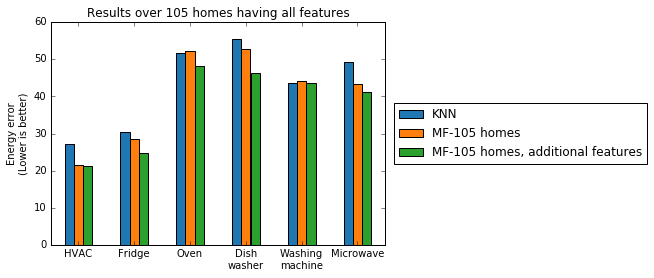

In [93]:
import matplotlib.pyplot as plt
results_df.plot(kind='bar',rot=0, colors=tableau20blind[::2])
lgd = plt.legend(loc='right', bbox_to_anchor=(1.8, 0.5))
plt.ylabel("Energy error\n(Lower is better)");
plt.title("Results over 105 homes having all features")
plt.savefig("../results/subset.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig("../results/subset.png",bbox_extra_artists=(lgd,), bbox_inches='tight')

Comparing MF with and without homes containing those features

In [23]:
best_combination

{'dw': ('occ', 1, 47.696584280069516),
 'fridge': ('occ_area', 2, 24.91311995551921),
 'hvac': ('rooms', 8, 21.29756141099046),
 'mw': ('occ', 2, 41.60195238757644),
 'oven': ('area_rooms', 8, 48.164684764512515),
 'wm': ('occ_rooms', 3, 43.7072363087808)}

In [31]:
pd.DataFrame(results)

,KNN,MF
dw,55.305178,47.696584
fridge,30.453563,24.913120
hvac,27.268441,21.297561
mw,49.199756,41.601952
oven,51.708601,48.164685
wm,43.735111,43.707236


In [100]:
for appliance in ['fridge','hvac','dw','mw','wm','oven']:
    mf_best = mf_subset_results[appliance][best_combination[appliance][0]][best_combination[appliance][1]]
    knn_best = knn_results[appliance]
    mf_best.columns = knn_best.columns
    common_index = np.intersect1d(mf_best.index, knn_best.index)
    mf_best = mf_best.ix[common_index]
    knn_best = knn_best.ix[common_index]
    knn_best_copy = knn_best.copy()
    mf_best_copy = mf_best.copy()
    max_two = (mf_best_copy.where(mf_best_copy > knn_best_copy, knn_best_copy).fillna(mf_best_copy))
    print appliance,100*((-mf_best+knn_best)/max_two).unstack().std()

fridge 57.3978457853
hvac 55.0774075892
dw 51.1713352881
mw 57.3493816955
wm 53.9492074301
oven 55.2763277251


In [ ]:
Calculating win/loss

In [113]:
o = {}
for appliance in ['fridge','hvac','dw','mw','wm','oven']:
    mf_best = mf_subset_results[appliance][best_combination[appliance][0]][best_combination[appliance][1]]
    knn_best = knn_results[appliance]
    mf_best.columns = knn_best.columns
    common_index = np.intersect1d(mf_best.index, knn_best.index)
    mf_best = mf_best.ix[common_index]
    knn_best = knn_best.ix[common_index]
    win = (knn_best>mf_best).sum().sum()
    loss = (knn_best<mf_best).sum().sum()
   
    o[appliance]={'win':win, "loss":loss, "win/loss":win*1./loss,"win/(win_loss)":win*1./(win+loss)} 

In [114]:
pd.DataFrame(o).T

,loss,win,win/(win_loss),win/loss
dw,309,380,0.551524,1.229773
fridge,411,405,0.496324,0.985401
hvac,253,317,0.556140,1.252964
mw,268,296,0.524823,1.104478
oven,179,180,0.501393,1.005587
wm,354,339,0.489177,0.957627


In [117]:
mf_best.median().mean()

48.164684764512515

In [118]:
knn_best.median().mean()

51.70860070119945

In [119]:
appliance

'oven'